In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, AveragePooling2D

Load MINST Dataset

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape, test_images.shape)

(60000, 784) (10000, 784)


MLP

In [38]:
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp = mlp_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = mlp_model.evaluate(test_images, test_labels)

print(f'Test accuracy of MLP: {test_accuracy:.4f}')

Epoch 1/20


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8661 - loss: 0.4451 - val_accuracy: 0.9651 - val_loss: 0.1110
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9710 - loss: 0.0905 - val_accuracy: 0.9708 - val_loss: 0.0928
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9810 - loss: 0.0597 - val_accuracy: 0.9728 - val_loss: 0.0944
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0443 - val_accuracy: 0.9759 - val_loss: 0.0886
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.9731 - val_loss: 0.1033
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.9744 - val_loss: 0.1037
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0262 - val_accuracy: 0.9737 - val_loss: 0.1120
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0235 - val_accuracy: 0.9747 - val_

LeNet

In [39]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

lenet_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), padding='same', activation='sigmoid', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='sigmoid'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(10, activation='softmax')
])

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lenet = lenet_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = lenet_model.evaluate(test_images, test_labels)
print(f'Test accuracy of LeNet: {test_accuracy:.4f}')

Epoch 1/20


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2154 - loss: 2.1444 - val_accuracy: 0.8403 - val_loss: 0.6101
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8591 - loss: 0.5174 - val_accuracy: 0.9129 - val_loss: 0.2994
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9145 - loss: 0.2943 - val_accuracy: 0.9364 - val_loss: 0.2194
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9336 - loss: 0.2213 - val_accuracy: 0.9470 - val_loss: 0.1769
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9469 - loss: 0.1771 - val_accuracy: 0.9568 - val_loss: 0.1412
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9554 - loss: 0.1475 - val_accuracy: 0.9622 - val_loss: 0.1209
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9648 - loss: 0.1167 - val_accuracy: 0.9666 - val_loss: 0.1092
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.1056 - val_accuracy: 0.9709 - val_

Shift images

In [40]:
def shift_im(input_image, delta_x, delta_y):
    shiffted_im = np.roll(input_image, shift = delta_x, axis = 0)
    shiffted_im = np.roll(input_image, shift = delta_y, axis = 1)
    return shiffted_im

Organize MLP and LeNet

In [41]:
def predict_mlp(input_image):
    input_image = input_image.reshape(1, 28*28)
    predictions = mlp_model.predict(input_image)
    y_pred = np.argmax(predictions)
    return y_pred

def predict_lenet(input_image):
    input_image = input_image.reshape(1, 28, 28, 1)
    predictions = lenet_model.predict(input_image)
    y_pred = np.argmax(predictions)
    return y_pred

Shift & display images

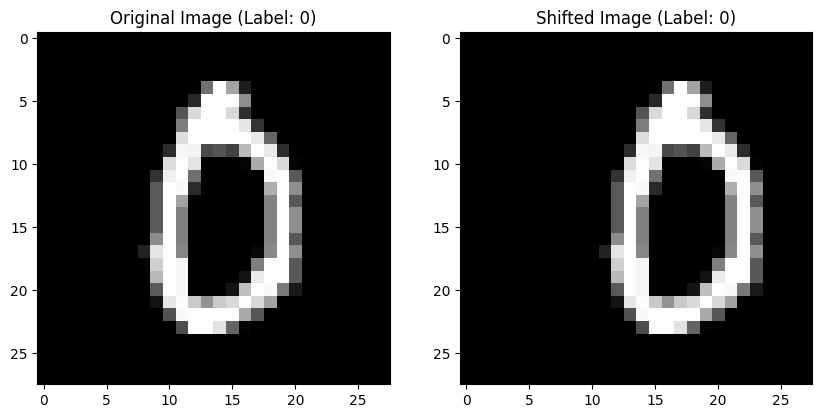

In [124]:
index = np.random.randint(0, test_images.shape[0])
shift_x = 5
shift_y = 3

original_image = test_images[index]
original_label = np.argmax(test_labels[index])

shifted_im = shift_im(original_image.squeeze(), shift_x, shift_y)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {original_label})')
plt.imshow(original_image.squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f'Shifted Image (Label: {original_label})')
plt.imshow(shifted_im, cmap='gray')
plt.show()

Predict shifted images

In [125]:
mlp_pred = predict_mlp(shifted_im)
print(f'Predicted label by MLP: {mlp_pred}')

lenet_prediction = predict_lenet(shifted_im)
print(f'Predicted label by LeNet: {lenet_prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted label by MLP: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted label by LeNet: 0
